# Multiple Linear Regression Analysis B

Author: E. Thompson-Becker

Analysis 1: Includes all independent variables: \SO2, NO2, CO, O3, TEMP, PRES, DEWP, and WSPM 

Analysis 2: Includes all independent variables: SO2, NO2, CO, O3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#load the csv file 
data = pd.read_csv("Shunyi_norm_data.csv")

In [3]:
#remove the column RAIN
data = data.drop(['RAIN'],axis=1)
#check the first 6 rows of the data set
data.head()

,Unnamed: 0,year,month,day,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
0,0,2013,3,1,0,0.001065,0.004012,0.011371,0.023438,0.020202,0.124568,0.277003,0.689781,0.244094,0.726562
1,1,2013,3,1,1,0.010650,0.010030,0.011371,0.019531,0.020202,0.133102,0.273519,0.695255,0.231496,0.734375
2,2,2013,3,1,2,0.012780,0.012036,0.011371,0.019531,0.010101,0.061979,0.263066,0.697080,0.204724,0.671875
3,3,2013,3,1,3,0.010650,0.010030,0.011371,0.011719,0.010101,0.061979,0.256098,0.717153,0.200000,0.515625
4,4,2013,3,1,4,0.010650,0.010030,0.011371,0.011719,0.010101,0.030685,0.250871,0.724453,0.206299,0.351562


# Multiple Linear Regression 

Includes all independent variables: SO2, NO2, CO, O3, TEMP, PRES, DEWP, and WSPM

In [7]:
#setting the independent and dependent variables
x = data[['SO2', 'NO2','CO','O3','TEMP','PRES','DEWP','WSPM']]
y = data['PM25']

In [8]:
#use training and test sets found in initial analysis
#based on testing 3 months of data at a time
#describing the independent variable 
xtrain1, xtest1 = data.iloc[:2922,7:15 ], data.iloc[2922:5844,7:15]
xtrain2, xtest2 = data.iloc[:5844,7:15 ], data.iloc[5844:8766,7:15 ]
xtrain3, xtest3 = data.iloc[:8766,7:15 ], data.iloc[8766:11688,7:15 ]
xtrain4, xtest4 = data.iloc[:11688,7:15 ], data.iloc[11688:14610,7:15 ]
xtrain5, xtest5 = data.iloc[:14610,7:15 ], data.iloc[14610:17532,7:15 ]
xtrain6, xtest6 = data.iloc[:17532,7:15 ], data.iloc[17532:20454,7:15 ]
xtrain7, xtest7 = data.iloc[:20454,7:15 ], data.iloc[20454:23376,7:15 ]
xtrain8, xtest8 = data.iloc[:23376,7:15 ], data.iloc[23376:26298,7:15 ]
xtrain9, xtest9 = data.iloc[:26298,7:15 ], data.iloc[26298:29220,7:15 ]
xtrain10, xtest10 = data.iloc[:29220,7:15 ], data.iloc[29220:32142,7:15 ]
xtrain11, xtest11 = data.iloc[:32142,7:15 ], data.iloc[32142:35063,7:15 ]

#setting the dependent variable
ytrain1, ytest1 = data.iloc[:2922,5 ], data.iloc[2922:5844,5 ]
ytrain2, ytest2 = data.iloc[:5844, 5], data.iloc[5844:8766, 5]
ytrain3, ytest3 = data.iloc[:8766,5 ], data.iloc[8766:11688, 5]
ytrain4, ytest4 = data.iloc[:11688,5 ], data.iloc[11688:14610,5 ]
ytrain5, ytest5 = data.iloc[:14610,5 ], data.iloc[14610:17532, 5]
ytrain6, ytest6 = data.iloc[:17532,5 ], data.iloc[17532:20454,5 ]
ytrain7, ytest7 = data.iloc[:20454,5 ], data.iloc[20454:23376,5 ]
ytrain8, ytest8 = data.iloc[:23376,5 ], data.iloc[23376:26298,5 ]
ytrain9, ytest9 = data.iloc[:26298,5], data.iloc[26298:29220,5]
ytrain10, ytest10 = data.iloc[:29220,5 ], data.iloc[29220:32142,5 ]
ytrain11, ytest11 = data.iloc[:32142,5 ], data.iloc[32142:35063, 5]

In [9]:
#fitting multiple linear regression model
MLR1 = lm.LinearRegression()
MLR1.fit(xtrain1,ytrain1)

LinearRegression()

In [10]:

#Intercept and Coefficient
print("Intercept: ", MLR1.intercept_)
print("Coefficients:")
list(zip(x, MLR1.coef_))

Intercept:  -0.042795114187258634
Coefficients:


[('SO2', 0.009761510002350106),
 ('NO2', 0.19616453963692537),
 ('CO', 0.4695505615105138),
 ('O3', 0.09860235683591204),
 ('TEMP', -0.11082622050985848),
 ('PRES', -0.025875843412927486),
 ('DEWP', 0.15333838709534453),
 ('WSPM', 0.032563818419744095)]

In [11]:

#Prediction of test set
y_pred_MLR1= MLR1.predict(xtest1)
#Predicted values
print("Prediction for test set: {}".format(y_pred_MLR1))


Prediction for test set: [0.14970263 0.1634204  0.16129271 ... 0.04620171 0.01985926 0.02069529]


In [12]:
#Actual value and the predicted value
MLR1_diff = pd.DataFrame({'Actual value': ytest1, 'Predicted value': y_pred_MLR1})
MLR1_diff

,Actual value,Predicted value
2922,0.200213,0.149703
2923,0.241747,0.163420
2924,0.279020,0.161293
2925,0.279020,0.151071
2926,0.236422,0.120074
...,...,...
5839,0.019169,0.037824
5840,0.007455,0.038276
5841,0.033014,0.046202
5842,0.027689,0.019859


In [13]:
#use evaluation metrics to check if the regression fits 
meanAbErr1 = metrics.mean_absolute_error(ytest1, y_pred_MLR1)
meanSqErr1 = metrics.mean_squared_error(ytest1, y_pred_MLR1)
rootMeanSqErr1 = np.sqrt(metrics.mean_squared_error(ytest1, y_pred_MLR1))
meanAbsPer1 = metrics.mean_absolute_percentage_error(ytest1, y_pred_MLR1)
r21 = metrics.r2_score(ytest1,y_pred_MLR1)
Adj_r21 = 1-(1-r21)*(len(xtrain1)-1)/(len(xtrain1)-9-1)
print('R squared:', r21)
print('Adjusted R squared:',Adj_r21)
print('Mean Absolute Error:', meanAbErr1)
print('Mean Absolute Percentage Error: {:.2f}'.format(meanAbsPer1))
print('Mean Square Error:', meanSqErr1)
print('Root Mean Square Error:', rootMeanSqErr1)

R squared: 0.2675772644255604
Adjusted R squared: 0.2653135952565461
Mean Absolute Error: 0.04775381595563587
Mean Absolute Percentage Error: 2.69
Mean Square Error: 0.003737635329568537
Root Mean Square Error: 0.06113620310068771


In [14]:
## repeat the above steps 11 times for each test set

#fitting multiple linear regression model
MLR2 = lm.LinearRegression()
MLR2.fit(xtrain2,ytrain2)

#fitting multiple linear regression model
MLR3 = lm.LinearRegression()
MLR3.fit(xtrain3,ytrain3)

#fitting multiple linear regression model
MLR4 = lm.LinearRegression()
MLR4.fit(xtrain4,ytrain4)

#fitting multiple linear regression model
MLR5 = lm.LinearRegression()
MLR5.fit(xtrain5,ytrain5)

#fitting multiple linear regression model
MLR6 = lm.LinearRegression()
MLR6.fit(xtrain6,ytrain6)

#fitting multiple linear regression model
MLR7 = lm.LinearRegression()
MLR7.fit(xtrain7,ytrain7)

#fitting multiple linear regression model
MLR8 = lm.LinearRegression()
MLR8.fit(xtrain8,ytrain8)

#fitting multiple linear regression model
MLR9 = lm.LinearRegression()
MLR9.fit(xtrain9,ytrain9)

#fitting multiple linear regression model
MLR10 = lm.LinearRegression()
MLR10.fit(xtrain10,ytrain10)

#fitting multiple linear regression model
MLR11 = lm.LinearRegression()
MLR11.fit(xtrain11,ytrain11)


LinearRegression()

In [15]:
#Prediction of test set
y_pred_MLR2= MLR2.predict(xtest2)
#Prediction of test set
y_pred_MLR3= MLR3.predict(xtest3)
#Prediction of test set
y_pred_MLR4= MLR4.predict(xtest4)
#Prediction of test set
y_pred_MLR5= MLR5.predict(xtest5)
#Prediction of test set
y_pred_MLR6= MLR6.predict(xtest6)
#Prediction of test set
y_pred_MLR7= MLR7.predict(xtest7)
#Prediction of test set
y_pred_MLR8= MLR8.predict(xtest8)
#Prediction of test set
y_pred_MLR9= MLR9.predict(xtest9)
#Prediction of test set
y_pred_MLR10= MLR1.predict(xtest10)
#Prediction of test set
y_pred_MLR11= MLR11.predict(xtest11)

In [16]:
#calculate the evaluation matrix for each trial
#trial 2
meanAbErr2 = metrics.mean_absolute_error(ytest2, y_pred_MLR2)
meanSqErr2 = metrics.mean_squared_error(ytest2, y_pred_MLR2)
rootMeanSqErr2 = np.sqrt(metrics.mean_squared_error(ytest2, y_pred_MLR2))
meanAbsPer2 = metrics.mean_absolute_percentage_error(ytest2, y_pred_MLR2)
r22 = metrics.r2_score(ytest2,y_pred_MLR2)
Adj_r22 = 1-(1-r22)*(len(xtrain2)-1)/(len(xtrain2)-9-1)

#trial 3
meanAbErr3 = metrics.mean_absolute_error(ytest3, y_pred_MLR3)
meanSqErr3 = metrics.mean_squared_error(ytest3, y_pred_MLR3)
rootMeanSqErr3 = np.sqrt(metrics.mean_squared_error(ytest3, y_pred_MLR3))
meanAbsPer3 = metrics.mean_absolute_percentage_error(ytest3, y_pred_MLR3)
r23 = metrics.r2_score(ytest3,y_pred_MLR3)
Adj_r23 = 1-(1-r23)*(len(xtrain3)-1)/(len(xtrain3)-9-1)

#trial 4
meanAbErr4 = metrics.mean_absolute_error(ytest4, y_pred_MLR4)
meanSqErr4 = metrics.mean_squared_error(ytest4, y_pred_MLR4)
rootMeanSqErr4 = np.sqrt(metrics.mean_squared_error(ytest4, y_pred_MLR4))
meanAbsPer4 = metrics.mean_absolute_percentage_error(ytest4, y_pred_MLR4)
r24 = metrics.r2_score(ytest4,y_pred_MLR4)
Adj_r24 = 1-(1-r24)*(len(xtrain4)-1)/(len(xtrain4)-9-1)

#trial 5
meanAbErr5 = metrics.mean_absolute_error(ytest5, y_pred_MLR5)
meanSqErr5 = metrics.mean_squared_error(ytest5, y_pred_MLR5)
rootMeanSqErr5 = np.sqrt(metrics.mean_squared_error(ytest5, y_pred_MLR5))
meanAbsPer5 = metrics.mean_absolute_percentage_error(ytest5, y_pred_MLR5)
r25 = metrics.r2_score(ytest5,y_pred_MLR5)
Adj_r25 = 1-(1-r25)*(len(xtrain5)-1)/(len(xtrain5)-9-1)

#trial 6
meanAbErr6 = metrics.mean_absolute_error(ytest6, y_pred_MLR6)
meanSqErr6 = metrics.mean_squared_error(ytest6, y_pred_MLR6)
rootMeanSqErr6 = np.sqrt(metrics.mean_squared_error(ytest6, y_pred_MLR6))
meanAbsPer6 = metrics.mean_absolute_percentage_error(ytest6, y_pred_MLR6)
r26 = metrics.r2_score(ytest6,y_pred_MLR6)
Adj_r26 = 1-(1-r26)*(len(xtrain6)-1)/(len(xtrain6)-9-1)

#trial 7
meanAbErr7 = metrics.mean_absolute_error(ytest7, y_pred_MLR7)
meanSqErr7 = metrics.mean_squared_error(ytest7, y_pred_MLR7)
rootMeanSqErr7 = np.sqrt(metrics.mean_squared_error(ytest7, y_pred_MLR7))
meanAbsPer7 = metrics.mean_absolute_percentage_error(ytest7, y_pred_MLR7)
r27 = metrics.r2_score(ytest7,y_pred_MLR7)
Adj_r27 = 1-(1-r27)*(len(xtrain7)-1)/(len(xtrain7)-9-1)

#trial 8 
meanAbErr8 = metrics.mean_absolute_error(ytest8, y_pred_MLR8)
meanSqErr8 = metrics.mean_squared_error(ytest8, y_pred_MLR8)
rootMeanSqErr8 = np.sqrt(metrics.mean_squared_error(ytest8, y_pred_MLR8))
meanAbsPer8 = metrics.mean_absolute_percentage_error(ytest8, y_pred_MLR8)
r28 = metrics.r2_score(ytest8,y_pred_MLR8)
Adj_r28 = 1-(1-r28)*(len(xtrain8)-1)/(len(xtrain8)-9-1)

#trial 9
meanAbErr9 = metrics.mean_absolute_error(ytest9, y_pred_MLR9)
meanSqErr9 = metrics.mean_squared_error(ytest9, y_pred_MLR9)
rootMeanSqErr9 = np.sqrt(metrics.mean_squared_error(ytest9, y_pred_MLR9))
meanAbsPer9 = metrics.mean_absolute_percentage_error(ytest9, y_pred_MLR9)
r29 = metrics.r2_score(ytest9,y_pred_MLR9)
Adj_r29 = 1-(1-r29)*(len(xtrain9)-1)/(len(xtrain9)-9-1)

#trial 10
meanAbErr10 = metrics.mean_absolute_error(ytest10, y_pred_MLR10)
meanSqErr10 = metrics.mean_squared_error(ytest10, y_pred_MLR10)
rootMeanSqErr10 = np.sqrt(metrics.mean_squared_error(ytest10, y_pred_MLR10))
meanAbsPer10 = metrics.mean_absolute_percentage_error(ytest10, y_pred_MLR10)
r210 = metrics.r2_score(ytest10,y_pred_MLR10)
Adj_r210 = 1-(1-r210)*(len(xtrain10)-1)/(len(xtrain10)-9-1)

#trial 11
meanAbErr11 = metrics.mean_absolute_error(ytest11, y_pred_MLR11)
meanSqErr11 = metrics.mean_squared_error(ytest11, y_pred_MLR11)
rootMeanSqErr11 = np.sqrt(metrics.mean_squared_error(ytest11, y_pred_MLR11))
meanAbsPer11 = metrics.mean_absolute_percentage_error(ytest11, y_pred_MLR11)
r211 = metrics.r2_score(ytest11,y_pred_MLR11)
Adj_r211 = 1-(1-r211)*(len(xtrain11)-1)/(len(xtrain11)-9-1)

In [17]:

#print all evaluation metrics in one data frame
trial = [1,2,3,4,5,6,7,8,9,10,11]
rsquared = [MLR1.score(x,y)*100, MLR2.score(x,y)*100, MLR3.score(x,y)*100,MLR4.score(x,y)*100,MLR5.score(x,y)*100,MLR6.score(x,y)*100,MLR7.score(x,y)*100,MLR8.score(x,y)*100,MLR9.score(x,y)*100,MLR10.score(x,y)*100,MLR11.score(x,y)*100]
R2 = [r21, r22, r23, r24, r25, r26, r27,r28,r29,r210,r211]
AdjR2 = [Adj_r21, Adj_r22, Adj_r23, Adj_r24, Adj_r25, Adj_r26, Adj_r27, Adj_r28, Adj_r29, Adj_r210, Adj_r211]
MAE = [meanAbErr1,meanAbErr2,meanAbErr3,meanAbErr4,meanAbErr5,meanAbErr6,meanAbErr7,meanAbErr8,meanAbErr9,meanAbErr10,meanAbErr11]
MSE = [meanSqErr1,meanSqErr2,meanSqErr3,meanSqErr4,meanSqErr5,meanSqErr6,meanSqErr7,meanSqErr8,meanSqErr9,meanSqErr10,meanSqErr11]
RMSE = [rootMeanSqErr1,rootMeanSqErr2,rootMeanSqErr3,rootMeanSqErr4,rootMeanSqErr5,rootMeanSqErr6,rootMeanSqErr7,rootMeanSqErr8,rootMeanSqErr9,rootMeanSqErr10,rootMeanSqErr11]
MAPE = [meanAbsPer1,meanAbsPer2,meanAbsPer3,meanAbsPer4,meanAbsPer5,meanAbsPer6, meanAbsPer7, meanAbsPer8, meanAbsPer9, meanAbsPer10, meanAbsPer11]

results = pd.DataFrame({'Trial': trial, 'R-Squared': R2, 'Adjusted R2': AdjR2,'Mean Absolute Error':MAE, 'Mean Absolute Percentage Error':MAPE, 'Mean Square Error': MSE, 'Root Mean Square Error': RMSE})
results

,Trial,R-Squared,Adjusted R2,Mean Absolute Error,Mean Absolute Percentage Error,Mean Square Error,Root Mean Square Error
0,1,0.267577,0.265314,0.047754,2.692421e+00,0.003738,0.061136
1,2,0.759407,0.759036,0.035448,1.277629e+00,0.002875,0.053619
2,3,0.487338,0.486811,0.035653,1.326054e+00,0.002321,0.048173
3,4,0.522475,0.522107,0.034400,9.060260e-01,0.002607,0.051054
4,5,0.727576,0.727408,0.033241,1.600402e+00,0.002348,0.048452
5,6,0.227113,0.226716,0.034352,1.249207e+00,0.002998,0.054752
6,7,0.513076,0.512862,0.033014,1.527073e+00,0.002135,0.046209
7,8,0.807909,0.807836,0.031837,1.074655e+00,0.003016,0.054914
8,9,0.579181,0.579037,0.034988,1.496266e+00,0.002906,0.053903
9,10,0.412021,0.411840,0.032496,1.515300e+00,0.001901,0.043603


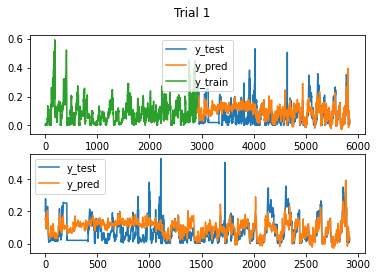

In [18]:
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred_MLR1)) + len(ytrain1),ytest1)
plt.plot(np.arange(len(y_pred_MLR1)) + len(ytrain1), y_pred_MLR1)
plt.plot(ytrain1)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR1)),ytest1)
plt.plot(np.arange(len(y_pred_MLR1)), y_pred_MLR1)

# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle("Trial 1")
plt.show()

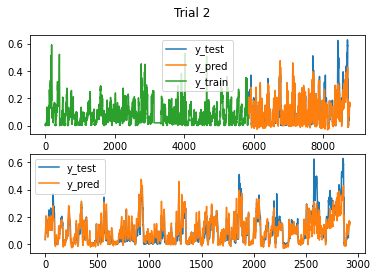

In [19]:
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred_MLR2)) + len(ytrain2),ytest2)
plt.plot(np.arange(len(y_pred_MLR2)) + len(ytrain2), y_pred_MLR2)
plt.plot(ytrain2)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR2)),ytest2)
plt.plot(np.arange(len(y_pred_MLR2)), y_pred_MLR2)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 2')
plt.show()

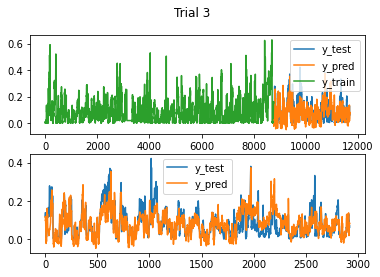

In [20]:
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred_MLR3)) + len(ytrain3),ytest3)
plt.plot(np.arange(len(y_pred_MLR3)) + len(ytrain3), y_pred_MLR3)
plt.plot(ytrain3)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR3)),ytest3)
plt.plot(np.arange(len(y_pred_MLR3)), y_pred_MLR3)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 3')
plt.show()


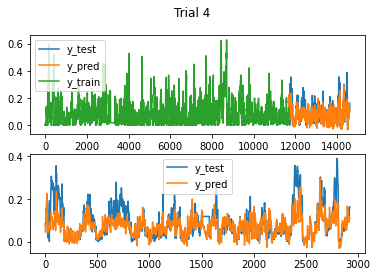

In [21]:
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred_MLR4)) + len(ytrain4),ytest4)
plt.plot(np.arange(len(y_pred_MLR4)) + len(ytrain4), y_pred_MLR4)
plt.plot(ytrain4)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR4)),ytest4)
plt.plot(np.arange(len(y_pred_MLR4)), y_pred_MLR4)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 4')
plt.show()


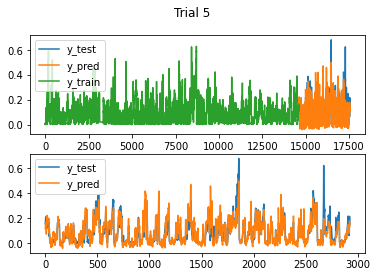

In [22]:
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred_MLR5)) + len(ytrain5),ytest5)
plt.plot(np.arange(len(y_pred_MLR5)) + len(ytrain5), y_pred_MLR5)
plt.plot(ytrain5)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR5)),ytest5)
plt.plot(np.arange(len(y_pred_MLR5)), y_pred_MLR5)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 5')
plt.show()


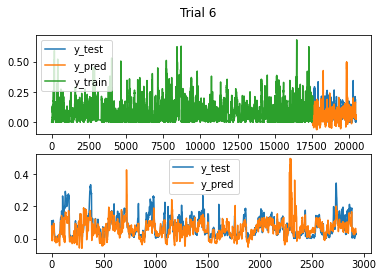

In [23]:
#trial 6
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred_MLR6)) + len(ytrain6),ytest6)
plt.plot(np.arange(len(y_pred_MLR6)) + len(ytrain6), y_pred_MLR6)
plt.plot(ytrain6)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR6)),ytest6)
plt.plot(np.arange(len(y_pred_MLR6)), y_pred_MLR6)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 6')
plt.show()


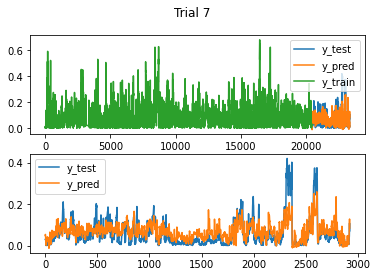

In [24]:
#trial 7
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred_MLR7)) + len(ytrain7),ytest7)
plt.plot(np.arange(len(y_pred_MLR7)) + len(ytrain7), y_pred_MLR7)
plt.plot(ytrain7)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR7)),ytest7)
plt.plot(np.arange(len(y_pred_MLR7)), y_pred_MLR7)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 7')
plt.show()


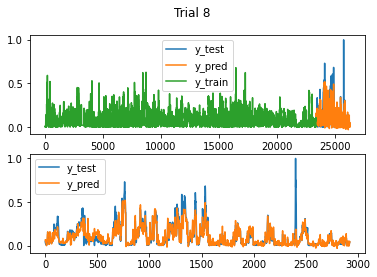

In [25]:
#trial 8
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred_MLR8)) + len(ytrain8),ytest8)
plt.plot(np.arange(len(y_pred_MLR8)) + len(ytrain8), y_pred_MLR8)
plt.plot(ytrain8)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR8)),ytest8)
plt.plot(np.arange(len(y_pred_MLR8)), y_pred_MLR8)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 8')
plt.show()

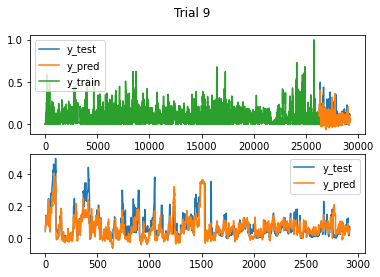

In [26]:
#trial 9
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred_MLR9)) + len(ytrain9),ytest9)
plt.plot(np.arange(len(y_pred_MLR9)) + len(ytrain9), y_pred_MLR9)
plt.plot(ytrain9)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR9)),ytest9)
plt.plot(np.arange(len(y_pred_MLR9)), y_pred_MLR9)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 9')
plt.show()

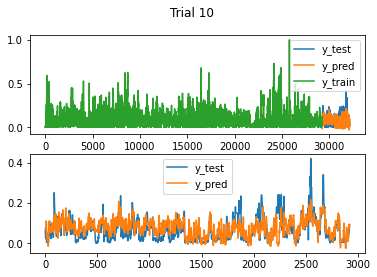

In [27]:
#trial 10
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred_MLR10)) + len(ytrain10),ytest10)
plt.plot(np.arange(len(y_pred_MLR10)) + len(ytrain10), y_pred_MLR10)
plt.plot(ytrain10)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR10)),ytest10)
plt.plot(np.arange(len(y_pred_MLR10)), y_pred_MLR10)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 10')
plt.show()

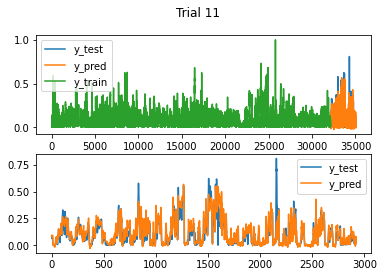

In [28]:
#trial 11
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred_MLR11)) + len(ytrain11),ytest11)
plt.plot(np.arange(len(y_pred_MLR11)) + len(ytrain11), y_pred_MLR11)
plt.plot(ytrain11)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR11)),ytest11)
plt.plot(np.arange(len(y_pred_MLR11)), y_pred_MLR11)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 11')
plt.show()

In [29]:
#residuals
res1 = ytest1 - y_pred_MLR1
res2 = ytest2 - y_pred_MLR2
res3 = ytest3 - y_pred_MLR3
res4 = ytest4 - y_pred_MLR4
res5 = ytest5 - y_pred_MLR5
res6 = ytest6 - y_pred_MLR6
res7 = ytest7 - y_pred_MLR7
res8 = ytest8 - y_pred_MLR8
res9 = ytest9 - y_pred_MLR9
res10 = ytest10 - y_pred_MLR10
res11 = ytest11 - y_pred_MLR11

residuals = [res1,res2,res3,res4,res5,res6,res7,res8,res9,res10,res11]
ypredict = [y_pred_MLR1, y_pred_MLR2,y_pred_MLR3, y_pred_MLR4, y_pred_MLR5, y_pred_MLR6, y_pred_MLR7, y_pred_MLR8, y_pred_MLR9, y_pred_MLR10, y_pred_MLR11]

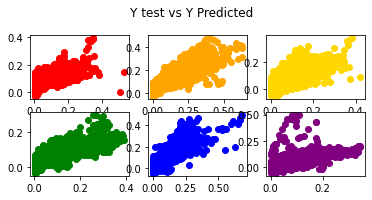

In [30]:
#Plot of test values vs predicted values
#for trials 1-6
plt.subplot(3, 3, 1)
plt.scatter(ytest1, y_pred_MLR1, color='r')
 
plt.subplot(3, 3, 2)
plt.scatter(ytest2, y_pred_MLR2, color = 'orange')
 
plt.subplot(3, 3, 3)
plt.scatter(ytest3, y_pred_MLR3, color = 'gold')
 
plt.subplot(3, 3, 4)
plt.scatter(ytest4, y_pred_MLR4, color = 'green')

plt.subplot(3, 3, 5)
plt.scatter(ytest5, y_pred_MLR5, color = 'blue')

plt.subplot(3, 3, 6)
plt.scatter(ytest6, y_pred_MLR6, color = 'purple')

 
plt.suptitle("Y test vs Y Predicted")
plt.show()

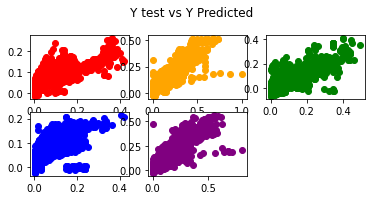

In [31]:
#Plot of test values vs predicted values
#for trials 7-11
plt.subplot(3, 3, 1)
plt.scatter(ytest7, y_pred_MLR7, color ='red')
 
plt.subplot(3, 3, 2)
plt.scatter(ytest8, y_pred_MLR8, color ='orange')
 
plt.subplot(3, 3, 3)
plt.scatter(ytest9, y_pred_MLR9, color = 'green')
 
plt.subplot(3, 3, 4)
plt.scatter(ytest10, y_pred_MLR10, color = 'blue')

plt.subplot(3, 3, 5)
plt.scatter(ytest11, y_pred_MLR11, color = 'purple')
 
plt.suptitle("Y test vs Y Predicted")
plt.show()

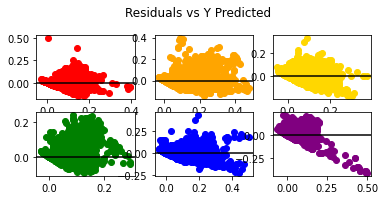

In [32]:
#Plot of residuals vs predicted values
plt.subplot(3, 3, 1)
plt.scatter(y_pred_MLR1, res1, color = 'red')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 2)
plt.scatter(y_pred_MLR2, res2, color = 'orange')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 3)
plt.scatter(y_pred_MLR3, res3, color = 'gold')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 4)
plt.scatter(y_pred_MLR4,res4, color = 'green')
plt.axhline(y=0, color='black')

plt.subplot(3, 3, 5)
plt.scatter(y_pred_MLR5,res5, color = 'blue')
plt.axhline(y=0, color='black')

plt.subplot(3, 3, 6)
plt.scatter(y_pred_MLR6,res6, color = 'purple')
plt.axhline(y=0, color='black')

 
plt.suptitle("Residuals vs Y Predicted")
plt.show()

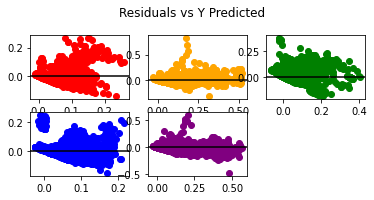

In [33]:
#Plot of residuals vs predicted values
x = 0 
plt.subplot(3, 3, 1)
plt.scatter(y_pred_MLR7, res7, color = 'red')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 2)
plt.scatter(y_pred_MLR8, res8, color = 'orange')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 3)
plt.scatter(y_pred_MLR9, res9, color = 'green')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 4)
plt.scatter(y_pred_MLR10,res10, color = 'blue')
plt.axhline(y=0, color='black')

plt.subplot(3, 3, 5)
plt.scatter(y_pred_MLR11,res11, color = 'purple')
plt.axhline(y=0, color='black')

#plot title and present
plt.suptitle("Residuals vs Y Predicted")
plt.show()

# Multiple Linear Regression 

Independent variables included: SO2, NO2, CO and O3

In [35]:
#setting the independent and dependent variables
x = data[['SO2', 'NO2','CO','O3']]
y = data['PM25']

In [36]:
#use training and test sets found in initial analysis
#based on testing 3 months of data at a time
#describing the independent variable 
xtrain1, xtest1 = data.iloc[:2922,7:11 ], data.iloc[2922:5844, 7:11]
xtrain2, xtest2 = data.iloc[:5844,7:11], data.iloc[5844:8766,7:11]
xtrain3, xtest3 = data.iloc[:8766,7:11], data.iloc[8766:11688,7:11 ]
xtrain4, xtest4 = data.iloc[:11688,7:11 ], data.iloc[11688:14610,7:11 ]
xtrain5, xtest5 = data.iloc[:14610,7:11], data.iloc[14610:17532,7:11]
xtrain6, xtest6 = data.iloc[:17532,7:11], data.iloc[17532:20454,7:11]
xtrain7, xtest7 = data.iloc[:20454,7:11], data.iloc[20454:23376,7:11]
xtrain8, xtest8 = data.iloc[:23376,7:11], data.iloc[23376:26298,7:11]
xtrain9, xtest9 = data.iloc[:26298,7:11], data.iloc[26298:29220,7:11]
xtrain10, xtest10 = data.iloc[:29220,7:11 ], data.iloc[29220:32142,7:11 ]
xtrain11, xtest11 = data.iloc[:32142,7:11], data.iloc[32142:35063,7:11]

#setting the dependent variable
ytrain1, ytest1 = data.iloc[:2922,5 ], data.iloc[2922:5844,5 ]
ytrain2, ytest2 = data.iloc[:5844, 5], data.iloc[5844:8766, 5]
ytrain3, ytest3 = data.iloc[:8766,5 ], data.iloc[8766:11688, 5]
ytrain4, ytest4 = data.iloc[:11688,5 ], data.iloc[11688:14610,5 ]
ytrain5, ytest5 = data.iloc[:14610,5 ], data.iloc[14610:17532,5]
ytrain6, ytest6 = data.iloc[:17532,5 ], data.iloc[17532:20454,5]
ytrain7, ytest7 = data.iloc[:20454,5 ], data.iloc[20454:23376,5]
ytrain8, ytest8 = data.iloc[:23376,5 ], data.iloc[23376:26298,5]
ytrain9, ytest9 = data.iloc[:26298,5], data.iloc[26298:29220,5]
ytrain10, ytest10 = data.iloc[:29220,5 ], data.iloc[29220:32142,5 ]
ytrain11, ytest11 = data.iloc[:32142,5 ], data.iloc[32142:35063,5]

In [37]:
#fitting multiple linear regression model
MLR1 = lm.LinearRegression()
MLR1.fit(xtrain1,ytrain1)
#Prediction of test set
y_pred1= MLR1.predict(xtest1)
#evaluation metrics
meanAbErr1 = metrics.mean_absolute_error(ytest1, y_pred1)
meanSqErr1 = metrics.mean_squared_error(ytest1, y_pred1)
rootMeanSqErr1 = np.sqrt(metrics.mean_squared_error(ytest1, y_pred1))
meanAbsPer1 = metrics.mean_absolute_percentage_error(ytest1, y_pred1)
r21 = metrics.r2_score(ytest1,y_pred_MLR1)
Adj_r21 = 1-(1-r21)*(len(xtrain1)-1)/(len(xtrain1)-5-1)

In [38]:
#trial 2
MLR2 = lm.LinearRegression()
MLR2.fit(xtrain2,ytrain2)
#Prediction of test set
y_pred2= MLR2.predict(xtest2)
#evaluation metrics
meanAbErr2 = metrics.mean_absolute_error(ytest2, y_pred2)
meanSqErr2 = metrics.mean_squared_error(ytest2, y_pred2)
rootMeanSqErr2 = np.sqrt(metrics.mean_squared_error(ytest2, y_pred2))
meanAbsPer2 = metrics.mean_absolute_percentage_error(ytest2, y_pred2)
r22 = metrics.r2_score(ytest2,y_pred_MLR2)
Adj_r22 = 1-(1-r22)*(len(xtrain2)-1)/(len(xtrain2)-5-1)

In [39]:
#trial 3
MLR3 = lm.LinearRegression()
MLR3.fit(xtrain3,ytrain3)
#Prediction of test set
y_pred3 = MLR3.predict(xtest3)
#evaluation metrics
meanAbErr3 = metrics.mean_absolute_error(ytest3, y_pred3)
meanSqErr3 = metrics.mean_squared_error(ytest3, y_pred3)
rootMeanSqErr3 = np.sqrt(metrics.mean_squared_error(ytest3, y_pred3))
meanAbsPer3 = metrics.mean_absolute_percentage_error(ytest3, y_pred3)
r23 = metrics.r2_score(ytest3,y_pred_MLR3)
Adj_r23 = 1-(1-r22)*(len(xtrain3)-1)/(len(xtrain3)-5-1)

In [40]:
#trial 4
MLR4 = lm.LinearRegression()
MLR4.fit(xtrain4,ytrain4)
#Prediction of test set
y_pred4= MLR4.predict(xtest1)
#evaluation metrics
meanAbErr4 = metrics.mean_absolute_error(ytest4, y_pred4)
meanSqErr4 = metrics.mean_squared_error(ytest4, y_pred4)
rootMeanSqErr4 = np.sqrt(metrics.mean_squared_error(ytest4, y_pred4))
meanAbsPer4 = metrics.mean_absolute_percentage_error(ytest4, y_pred_MLR4)
r24 = metrics.r2_score(ytest4,y_pred_MLR4)
Adj_r24 = 1-(1-r24)*(len(xtrain4)-1)/(len(xtrain4)-5-1)

In [41]:
#trial 5
MLR5 = lm.LinearRegression()
MLR5.fit(xtrain5,ytrain5)
#Prediction of test set
y_pred5= MLR5.predict(xtest5)
#evaluation metrics
meanAbErr5 = metrics.mean_absolute_error(ytest5, y_pred5)
meanSqErr5 = metrics.mean_squared_error(ytest5, y_pred5)
rootMeanSqErr5 = np.sqrt(metrics.mean_squared_error(ytest5, y_pred5))
meanAbsPer5 = metrics.mean_absolute_percentage_error(ytest5, y_pred5)
r25 = metrics.r2_score(ytest5,y_pred_MLR5)
Adj_r25 = 1-(1-r25)*(len(xtrain5)-1)/(len(xtrain5)-5-1)

In [42]:
#trial 6
MLR6 = lm.LinearRegression()
MLR6.fit(xtrain6,ytrain6)
#Prediction of test set
y_pred6= MLR6.predict(xtest6)
#evaluation metrics
meanAbErr6 = metrics.mean_absolute_error(ytest6, y_pred6)
meanSqErr6 = metrics.mean_squared_error(ytest6, y_pred6)
rootMeanSqErr6 = np.sqrt(metrics.mean_squared_error(ytest6, y_pred6))
meanAbsPer6 = metrics.mean_absolute_percentage_error(ytest6, y_pred6)
r26 = metrics.r2_score(ytest6,y_pred_MLR6)
Adj_r26 = 1-(1-r26)*(len(xtrain6)-1)/(len(xtrain6)-5-1)

In [43]:
#trial 7
MLR7 = lm.LinearRegression()
MLR7.fit(xtrain7,ytrain7)
#Prediction of test set
y_pred7= MLR7.predict(xtest7)
#evaluation metrics
meanAbErr7 = metrics.mean_absolute_error(ytest7, y_pred7)
meanSqErr7 = metrics.mean_squared_error(ytest7, y_pred7)
rootMeanSqErr7 = np.sqrt(metrics.mean_squared_error(ytest7, y_pred7))
meanAbsPer7 = metrics.mean_absolute_percentage_error(ytest7, y_pred7)
r27 = metrics.r2_score(ytest7,y_pred_MLR7)
Adj_r27 = 1-(1-r27)*(len(xtrain7)-1)/(len(xtrain7)-5-1)

In [44]:
#trial 8
MLR8 = lm.LinearRegression()
MLR8.fit(xtrain8,ytrain8)
#Prediction of test set
y_pred8= MLR8.predict(xtest8)
#evaluation metrics
meanAbErr8 = metrics.mean_absolute_error(ytest8, y_pred8)
meanSqErr8 = metrics.mean_squared_error(ytest8, y_pred8)
rootMeanSqErr8 = np.sqrt(metrics.mean_squared_error(ytest8, y_pred8))
meanAbsPer8 = metrics.mean_absolute_percentage_error(ytest8, y_pred8)
r28 = metrics.r2_score(ytest8,y_pred_MLR8)
Adj_r28 = 1-(1-r28)*(len(xtrain8)-1)/(len(xtrain8)-5-1)

In [45]:
#trial 9
MLR9 = lm.LinearRegression()
MLR9.fit(xtrain9,ytrain9)
#Prediction of test set
y_pred9= MLR9.predict(xtest9)
#evaluation metrics
meanAbErr9 = metrics.mean_absolute_error(ytest9, y_pred9)
meanSqErr9 = metrics.mean_squared_error(ytest9, y_pred9)
rootMeanSqErr9 = np.sqrt(metrics.mean_squared_error(ytest9, y_pred9))
meanAbsPer9 = metrics.mean_absolute_percentage_error(ytest9, y_pred9)
r29 = metrics.r2_score(ytest9,y_pred_MLR9)
Adj_r29 = 1-(1-r29)*(len(xtrain9)-1)/(len(xtrain9)-5-1)

In [46]:
#trial 10
MLR10 = lm.LinearRegression()
MLR10.fit(xtrain10,ytrain10)
#Prediction of test set
y_pred10= MLR10.predict(xtest10)
#evaluation metrics
meanAbErr10 = metrics.mean_absolute_error(ytest10, y_pred10)
meanSqErr10 = metrics.mean_squared_error(ytest10, y_pred10)
rootMeanSqErr10 = np.sqrt(metrics.mean_squared_error(ytest10, y_pred10))
meanAbsPer10 = metrics.mean_absolute_percentage_error(ytest10, y_pred10)
r210 = metrics.r2_score(ytest10,y_pred_MLR10)
Adj_r210 = 1-(1-r210)*(len(xtrain10)-1)/(len(xtrain10)-5-1)

In [47]:
#trial 11
MLR11 = lm.LinearRegression()
MLR11.fit(xtrain11,ytrain11)
#Prediction of test set
y_pred11= MLR11.predict(xtest11)
#evaluation metrics
meanAbErr11 = metrics.mean_absolute_error(ytest11, y_pred11)
meanSqErr11 = metrics.mean_squared_error(ytest11, y_pred11)
rootMeanSqErr11 = np.sqrt(metrics.mean_squared_error(ytest11, y_pred11))
meanAbsPer11 = metrics.mean_absolute_percentage_error(ytest11, y_pred11)
r211 = metrics.r2_score(ytest11,y_pred_MLR11)
Adj_r211 = 1-(1-r211)*(len(xtrain11)-1)/(len(xtrain11)-5-1)

In [48]:
#print all evaluation metrics in one data frame
trial = [1,2,3,4,5,6,7,8,9,10,11]
R2 = [r21, r22, r23, r24, r25, r26, r27,r28,r29,r210,r211]
AdjR2 = [Adj_r21, Adj_r22, Adj_r23, Adj_r24, Adj_r25, Adj_r26, Adj_r27, Adj_r28, Adj_r29, Adj_r210, Adj_r211]
rsquared = [MLR1.score(x,y)*100, MLR2.score(x,y)*100, MLR3.score(x,y)*100,MLR4.score(x,y)*100,MLR5.score(x,y)*100,MLR6.score(x,y)*100,MLR7.score(x,y)*100,MLR8.score(x,y)*100,MLR9.score(x,y)*100,MLR10.score(x,y)*100,MLR11.score(x,y)*100]
MAE = [meanAbErr1,meanAbErr2,meanAbErr3,meanAbErr4,meanAbErr5,meanAbErr6,meanAbErr7,meanAbErr8,meanAbErr9,meanAbErr10,meanAbErr11]
MSE = [meanSqErr1,meanSqErr2,meanSqErr3,meanSqErr4,meanSqErr5,meanSqErr6,meanSqErr7,meanSqErr8,meanSqErr9,meanSqErr10,meanSqErr11]
RMSE = [rootMeanSqErr1,rootMeanSqErr2,rootMeanSqErr3,rootMeanSqErr4,rootMeanSqErr5,rootMeanSqErr6,rootMeanSqErr7,rootMeanSqErr8,rootMeanSqErr9,rootMeanSqErr10,rootMeanSqErr11]
MAPE = [meanAbsPer1,meanAbsPer2,meanAbsPer3,meanAbsPer4,meanAbsPer5,meanAbsPer6, meanAbsPer7, meanAbsPer8, meanAbsPer9, meanAbsPer10, meanAbsPer11]

results = pd.DataFrame({'Trial': trial, 'R-Squared': R2,'Adjusted R2':AdjR2, 'Mean Absolute Error':MAE, 'Mean Absolute Percentage Error':MAPE, 'Mean Square Error': MSE, 'Root Mean Square Error': RMSE})
results

,Trial,R-Squared,Adjusted R2,Mean Absolute Error,Mean Absolute Percentage Error,Mean Square Error,Root Mean Square Error
0,1,0.267577,0.266321,0.042641,2.178687e+00,0.003423,0.058508
1,2,0.759407,0.759201,0.038947,1.401055e+00,0.003258,0.057081
2,3,0.487338,0.759270,0.035361,1.116857e+00,0.002458,0.049580
3,4,0.522475,0.522271,0.067116,9.060260e-01,0.007823,0.088450
4,5,0.727576,0.727483,0.035823,1.371166e+00,0.002731,0.052262
5,6,0.227113,0.226892,0.031580,9.737832e-01,0.003252,0.057030
6,7,0.513076,0.512957,0.028792,1.150326e+00,0.002075,0.045554
7,8,0.807909,0.807868,0.033301,1.210298e+00,0.003014,0.054897
8,9,0.579181,0.579101,0.034987,1.495128e+00,0.002928,0.054109
9,10,0.412021,0.411920,0.028033,9.716695e-01,0.001810,0.042541


In [49]:
#residuals
res1 = ytest1 - y_pred_MLR1
res2 = ytest2 - y_pred_MLR2
res3 = ytest3 - y_pred_MLR3
res4 = ytest4 - y_pred_MLR4
res5 = ytest5 - y_pred_MLR5
res6 = ytest6 - y_pred_MLR6
res7 = ytest7 - y_pred_MLR7
res8 = ytest8 - y_pred_MLR8
res9 = ytest9 - y_pred_MLR9
res10 = ytest10 - y_pred_MLR10
res11 = ytest11 - y_pred_MLR11

residuals = [res1,res2,res3,res4,res5,res6,res7,res8,res9,res10,res11]
ypredict = [y_pred_MLR1, y_pred_MLR2,y_pred_MLR3, y_pred_MLR4, y_pred_MLR5, y_pred_MLR6, y_pred_MLR7, y_pred_MLR8, y_pred_MLR9, y_pred_MLR10, y_pred_MLR11]

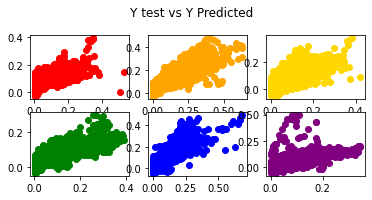

In [50]:
#Plot of test values vs predicted values
#for trials 1-6
plt.subplot(3, 3, 1)
plt.scatter(ytest1, y_pred_MLR1, color='r')
 
plt.subplot(3, 3, 2)
plt.scatter(ytest2, y_pred_MLR2, color = 'orange')
 
plt.subplot(3, 3, 3)
plt.scatter(ytest3, y_pred_MLR3, color = 'gold')
 
plt.subplot(3, 3, 4)
plt.scatter(ytest4, y_pred_MLR4, color = 'green')

plt.subplot(3, 3, 5)
plt.scatter(ytest5, y_pred_MLR5, color = 'blue')

plt.subplot(3, 3, 6)
plt.scatter(ytest6, y_pred_MLR6, color = 'purple')

 
plt.suptitle("Y test vs Y Predicted")
plt.show()

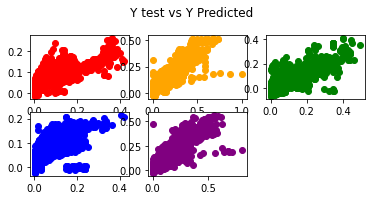

In [51]:
#Plot of test values vs predicted values
#for trials 7-11
plt.subplot(3, 3, 1)
plt.scatter(ytest7, y_pred_MLR7, color ='red')
 
plt.subplot(3, 3, 2)
plt.scatter(ytest8, y_pred_MLR8, color ='orange')
 
plt.subplot(3, 3, 3)
plt.scatter(ytest9, y_pred_MLR9, color = 'green')
 
plt.subplot(3, 3, 4)
plt.scatter(ytest10, y_pred_MLR10, color = 'blue')

plt.subplot(3, 3, 5)
plt.scatter(ytest11, y_pred_MLR11, color = 'purple')
 
plt.suptitle("Y test vs Y Predicted")
plt.show()

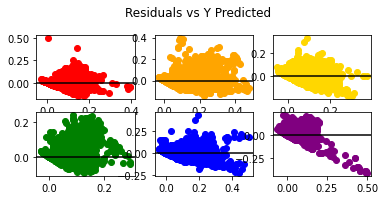

In [52]:
#Plot of residuals vs predicted values
plt.subplot(3, 3, 1)
plt.scatter(y_pred_MLR1, res1, color = 'red')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 2)
plt.scatter(y_pred_MLR2, res2, color = 'orange')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 3)
plt.scatter(y_pred_MLR3, res3, color = 'gold')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 4)
plt.scatter(y_pred_MLR4,res4, color = 'green')
plt.axhline(y=0, color='black')

plt.subplot(3, 3, 5)
plt.scatter(y_pred_MLR5,res5, color = 'blue')
plt.axhline(y=0, color='black')

plt.subplot(3, 3, 6)
plt.scatter(y_pred_MLR6,res6, color = 'purple')
plt.axhline(y=0, color='black')

 
plt.suptitle("Residuals vs Y Predicted")
plt.show()

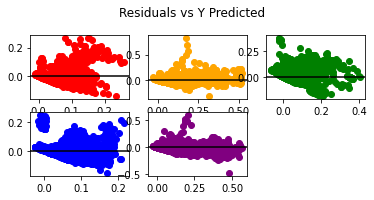

In [53]:
#Plot of residuals vs predicted values
x = 0 
plt.subplot(3, 3, 1)
plt.scatter(y_pred_MLR7, res7, color = 'red')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 2)
plt.scatter(y_pred_MLR8, res8, color = 'orange')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 3)
plt.scatter(y_pred_MLR9, res9, color = 'green')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 4)
plt.scatter(y_pred_MLR10,res10, color = 'blue')
plt.axhline(y=0, color='black')

plt.subplot(3, 3, 5)
plt.scatter(y_pred_MLR11,res11, color = 'purple')
plt.axhline(y=0, color='black')

#plot title and present
plt.suptitle("Residuals vs Y Predicted")
plt.show()